Dataset preview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Species count:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


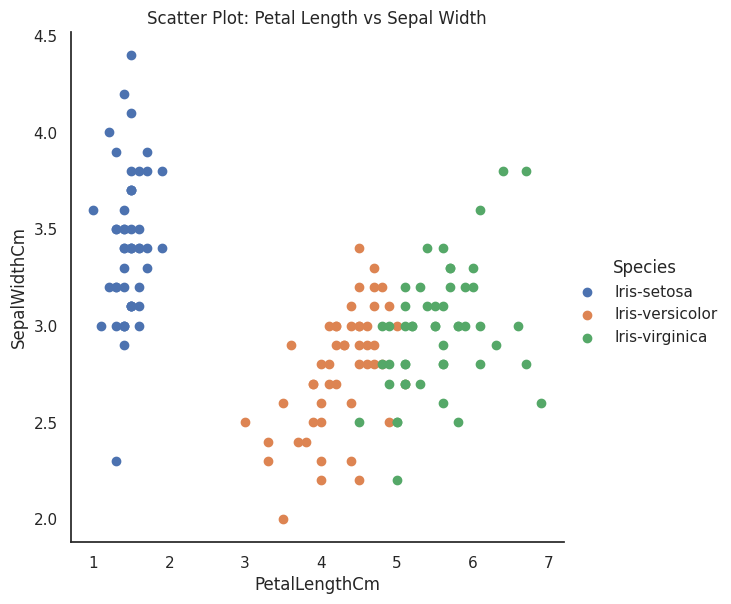

Checking for missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Unique values in Species column after cleaning:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Dataset with numerical labels:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0
Target variable y is clean.

Model trained successfully.
Model Accuracy: 0.97

Predicted classes:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 

interactive(children=(FloatSlider(value=50.00000000000001, description='Regu', min=0.1), Dropdown(description=…

<function __main__.Regularization_Logistic(Regu, type)>

In [24]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model, datasets
import numpy as np

iris = pd.read_csv("/content/drive/MyDrive/Iris.csv")
print("Dataset preview:")
print(iris.head())


print("\nSpecies count:")
print(iris["Species"].value_counts())


sns.FacetGrid(iris, hue="Species", height=6).map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()
plt.title("Scatter Plot: Petal Length vs Sepal Width")
plt.show()

print("Checking for missing values:")
print(iris.isnull().sum())

if iris['Species'].isnull().sum() > 0:
    iris.dropna(subset=['Species'], inplace=True)


print("Unique values in Species column after cleaning:")
print(iris['Species'].unique())


flower_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris["Species"] = iris["Species"].map(flower_mapping)
print("\nDataset with numerical labels:")
print(iris.head())


X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = iris['Species'].values
if pd.isnull(y).any():
    print("Target variable y still contains NaN after cleanup!")
else:
    print("Target variable y is clean.")

model = LogisticRegression()
model.fit(X, y)
print("\nModel trained successfully.")

accuracy = model.score(X, y)
print(f"Model Accuracy: {accuracy:.2f}")

expected = y
predicted = model.predict(X)
print("\nPredicted classes:")
print(predicted)

print("\nClassification Report:")
print(metrics.classification_report(expected, predicted))

print("\nConfusion Matrix:")
print(metrics.confusion_matrix(expected, predicted))


def Regularization_Logistic(Regu, type):

    iris = datasets.load_iris()
    X = iris.data[:, :2]
    Y = iris.target

    h = 0.02

    logreg = linear_model.LogisticRegression(C=Regu, penalty=type, solver='liblinear')

    logreg.fit(X, Y)


    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='black', cmap=plt.cm.RdYlBu)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f"Regularization Type: {type}, C={Regu}")
    plt.show()

    expected = Y
    predicted = logreg.predict(X)
    print("\nRegularization Classification Report:")
    print(metrics.classification_report(expected, predicted))
    print("\nConfusion Matrix:")
    print(metrics.confusion_matrix(expected, predicted))


from ipywidgets import interact
interact(Regularization_Logistic, Regu=(0.1, 100, 0.1), type=['l1', 'l2'])